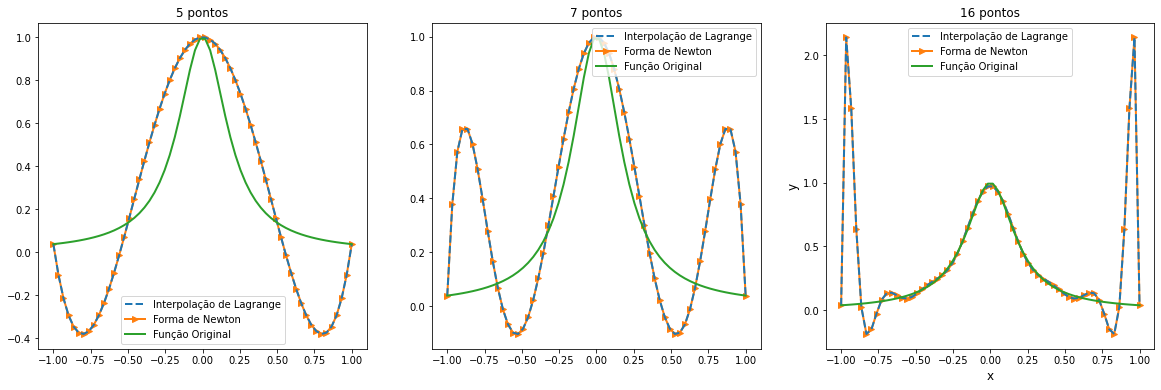

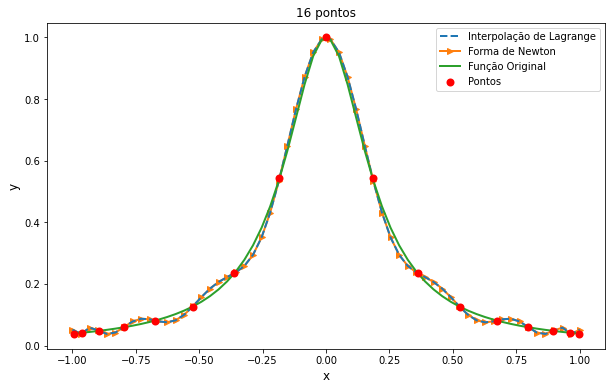

[-2.  0.  3.  5.]
[ 3. -2.  4.  2.]


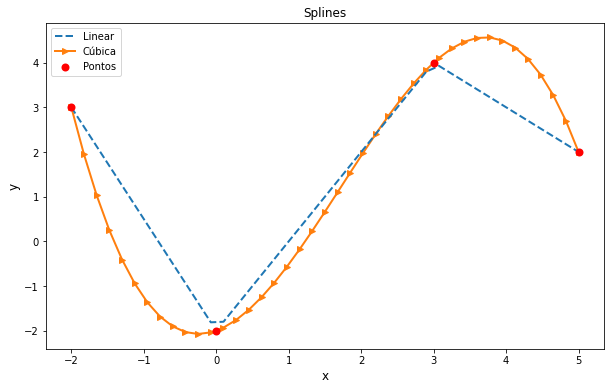

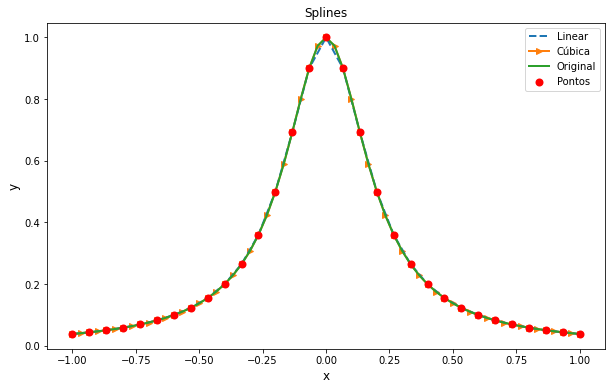

In [ ]:
import numpy as np
from scipy import linalg as lin
import scipy as sci
import math as m
import matplotlib.pyplot as plt
from sympy import *
import time

# Lagrange
def lagrange_interp(xi,yi,x):
    n = np.size(xi); # maior dimensão de um vetor unidimensional
    m = np.size(x); # maior dimensão de um vetor unidimensional
    
    L = np.ones((n,m));

    for i in np.arange(n):
        for j in np.arange(n):
            if(i != j):
                L[i,:] = (L[i,:]*(x-xi[j]))/(xi[i]-xi[j]);

    y = yi.dot(L); # --> yi é vetor linha 1xn L é matriz nxm --> 1xm
    return y;

# Newton
def newton_interp(xi,yi,x):
    n = np.size(xi); ni = np.size(x); N = np.ones((n,ni));
    D = np.zeros((n,n)); D[:,0] = yi;
    
    for j in np.arange(n-1): # matriz de diferenças divididas
        for i in np.arange(n-j-1):
            D[i,j+1] = (D[i+1,j]-D[i,j])/(xi[i+j+1]-xi[i]);

    for i in np.arange(1,n): # loop do produtório da forma de Newton
        N[i,:] = N[i-1,:]*(x-xi[i-1]);
    
    y = D[0,:].dot(N)
    
    return y

# Fenômeno de Runge

# 5 nós de interpolação
xi = np.linspace(-1,1,num=5, endpoint=True)
# print(xi)
yi = 1/(1+25*xi**2);
# print(yi)
x = np.linspace(-1,1,num=60, endpoint=True)
y_exat = 1/(1+25*x**2);

y_lagrange5 = lagrange_interp(xi,yi,x);
y_newton5 = newton_interp(xi,yi,x)

# 7 nós de interpolação
xi = np.linspace(-1,1,num=7, endpoint=True)
# print(xi)
yi = 1/(1+25*xi**2);
# print(yi)
x = np.linspace(-1,1,num=60, endpoint=True)
y_exat = 1/(1+25*x**2);

y_lagrange7 = lagrange_interp(xi,yi,x);
y_newton7 = newton_interp(xi,yi,x)

# 16 nós de interpolação
xi = np.linspace(-1,1,num=16, endpoint=True)
# print(xi)
yi = 1/(1+25*xi**2);
# print(yi)
x = np.linspace(-1,1,num=60, endpoint=True)
y_exat = 1/(1+25*x**2);

y_lagrange16 = lagrange_interp(xi,yi,x);
y_newton16 = newton_interp(xi,yi,x)

f = plt.figure(figsize=(20,6),facecolor='white')
f.add_subplot(1,3,1);
plt.plot(x,y_lagrange5,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton5,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exat,label = 'Função Original',linewidth = 2,zorder=3)
plt.legend()
plt.title('5 pontos') 
f.add_subplot(1,3,2);
plt.plot(x,y_lagrange7,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton7,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exat,label = 'Função Original',linewidth = 2,zorder=3)
plt.legend()
plt.title('7 pontos')
f.add_subplot(1,3,3);
plt.plot(x,y_lagrange16,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newton16,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exat,label = 'Função Original',linewidth = 2,zorder=3)
plt.legend()
plt.title('16 pontos')
# plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4) 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large')  
plt.show()

#Chebyshev
a = -1; b = 1;
# 17 nós de interpolação
n = 16;
xi = np.zeros(n+1);
i = np.arange(n+1);
xi = (a+b)/2 + (b-a)*np.cos((2*i+1)*m.pi/(2*(n+1)))/2
# print(xi)

yi = 1/(1+25*xi**2);
# print(yi)
x = np.linspace(-1,1,num=60, endpoint=True)
y_exat = 1/(1+25*x**2);

y_lagrangeC = lagrange_interp(xi,yi,x);
y_newtonC = newton_interp(xi,yi,x)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_lagrangeC,label = 'Interpolação de Lagrange',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_newtonC,label = 'Forma de Newton',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exat,label = 'Função Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4) 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('16 pontos') 
plt.legend() 
plt.show()

# Splines
from scipy.interpolate import interp1d

# Exemplo slide 12

xi = np.array([-2,0,3,5], dtype='double');
print(xi);
yi = np.array([3,-2,4,2], dtype='double');
print(yi);
x = np.linspace(-2, 5, num=41, endpoint=True)

f_linear = interp1d(xi,yi)
y_linear = f_linear(x);
f_cubic = interp1d(xi,yi, kind='cubic')
y_cubic = f_cubic(x);

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_linear,label = 'Linear',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_cubic,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=3) 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Splines') 
plt.legend() 
plt.show()

# Exemplo do fenômeno de Runge

# 16 nós de interpolação
xi = np.linspace(-1,1,num=31, endpoint=True)
# print(xi)
yi = 1/(1+25*xi**2);
# print(yi)
x = np.linspace(-1, 1, num=61, endpoint=True)
y_exat = 1/(1+25*x**2);

f_linear = interp1d(xi,yi)
y_linear = f_linear(x);
f_cubic = interp1d(xi,yi, kind='cubic')
y_cubic = f_cubic(x);

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,y_linear,label = 'Linear',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x,y_cubic,label = 'Cúbica',linewidth = 2,marker='>',zorder=1)
plt.plot(x,y_exat,label = 'Original',linewidth = 2,zorder=3)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2,facecolor='red',zorder=4) 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Splines') 
plt.legend() 
plt.show()